## finra_api_queries
### Cindy Chen, cjc2279

### What is the FINRA Query API?
FINRA is the Financial Industry Regulatory Authority, which oversees US brokerages and exchanges such as the NYSE and NASDAQ.  They ensure that brokers and dealers in US stock/debt markets are acting according to the laws and rules defined by the Securities and Exchange Commission (SEC) as well as by FINRA.  This API contains information about historical market activity, such as fixed income market activity, statistics such as the size of trades that major institutional investors make, and over-the-counter (OTC) trading activity.  This information allows regulators as well as the public to understand market trading behavior.

An API wrapper for this API does not already exist, likely because market trading information in the API is for regulatory purposes and does not serve any financial value with buying or selling equities or debt.

#### What does this package do?
The finra_api_queries package simplifies the querying of the FINRA Query API including more complex API calls. It also features functions that enable the time series data visualization of fixed income data, summarization of key market breadth data, and keyword filtering for stocks.

#### readthedocs Package Documentation
https://readthedocs.org/projects/finra-queries-api/

#### Test PyPi Link
https://test.pypi.org/project/finra-api-queries/

__Step 1. Install the package from test.pypi__

In [1]:
# install package
! pip install  -i https://test.pypi.org/simple/ finra-api-queries

Looking in indexes: https://test.pypi.org/simple/


__Load Package__

In [2]:
# import package from test.pypi
from finra_api_queries import finra_api_queries

c:\Users\Cindy C\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


__Function 1:__ The __retrieve_api_token()__ function helps the user generate a time-sensitive API token that's required to access the FINRA Query API.  It simplifies the process so that the user does not have to write a request.post() statement to get this information.

In [3]:
from dotenv import load_dotenv
load_dotenv()
finra_api_key = os.getenv('FINRA_API_CLIENT')
finra_api_secret = os.getenv('SECRET')

In [4]:
# generate the api key
cindys_api_key = finra_api_queries.retrieve_api_token(finra_api_key, finra_api_secret)
print(cindys_api_key)

*AAJTSQACMDIABHR5cGUAA0pXVAACUzEAAjAx*eyJ0eXAiOiJKV1QiLCJjdHkiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.ZXlKMGVYQWlPaUpLVjFRaUxDSmxibU1pT2lKQk1USTRRMEpETFVoVE1qVTJJaXdpWVd4bklqb2laR2x5SW4wLi5TUG9PdGM5TE5SbnJ4NkdFVTZ4cFl3Lm9WZkFTUEVTMFBqTUt3NmI1a2VUZUdsamdDY09HbFRhY2FzMmdTWDVkZ05MeS1xdWt6a1hnUTJIRHVCbDJGRVBFY3JybWZhQkpTLThOOXhOWFlnYWpwTFJ1UzkzeXNVX2tmdkVGbDhSaHBZaE5VTEpNVzFFSnAyRFd5cGlCM3JxeVdBbnl0enFLXzVnQVNIbDF6VENMUWVDb0REOXpjX1FBa2hRcFA2TEk4N2wzdjFPZkpFZ0tCb05JaGhqQTFjbU5MSmpuVlpUNktFWURHRnZ4YzlBZlMtOHpMa1B4ODctck1zZHZRdTZWczl5NmdsSWljUTZIT0tCUmYwYlVsbXY0eExRR0ZlS1RabnQ1b1o2aFhmMHlJSEZCLS01SUhGMUM0VUt0RkF0bDFaSmhFejY4cTBjZUY0TGttUzMzNHdkNWh0VmZjajhKSmFmd1FwN0lEQjRSNmFUZHdOcHp6bGQxUW1VYnpKa0pzcVRuSUZmelpMQkduc1lkMXV5RER4X0RicmszZmloSERRaDlFM2pmd1MxZk9OdUUzWjA2T0Q2M2Y3WmRZVmlIQ0N5M0VBUGF0UlEtSkZqOXQ5aUl6dEtCOWQzZ0F3OUFMRkxSY0RqWDdtV3pZcWZuSEtCU0U1OHNhNXVmRnB0cnNyT01nUjBlTFlVbm84bzZCTi1iam85aW93VDFObzgtRW8wWkwtemFzdTJQeEJCN3VoQU5qRGwxZEZ6bDhLMkNpY3E1dVMwRjJ3YjJMOWdubWZ2RVQ3UU5hT2EySU5WOHFMd1F4U0FTa

__Function 2:__ The __retrieve_dataset()__ function enables the user to retrieve one of FINRA's 15 publicly-accessible data sets.  It gives them the option to perform more complex querying, such as filtering on specific values including comparisons like "> 1000", or on a date range, returning only certain columns in a data set, and limiting the number of rows returned in the API call.  The function elegantly simplifies the inclusion of additional filters/parameters in the API call where possible.  This is extremely helpful since public use of the API has a 10 GB monthly data limit, so being able to filter data as precisely as possible to minimize superfluous data in the API call minimizes the data usage.

The function also automates the complex input requirements of the API. For instance, the 'filters' input in the function allows users to input filters in a much simpler and more intuitive manner than the API request requires.  Whereas a user engaging directly with the API must list categorical filters (like Company == "JP Morgan") and numeric filters (like tradeSize > 800) in separate dictionaries for separate parameters, this function uses regex, if statements, and loops to automatically separate out those parameters for the user and input them into the API call.

In [7]:
# retrieve a data set
dataset_name = "otc_blocks_summary"
rows_returned = 200
filtered_columns_input = ['lastUpdateDate', 'averageTradeSize', 'crdFirmName']
filters_input = {'crdFirmName': ['CITADEL SECURITIES LLC', 'SIDOTI & COMPANY, LLC'],
                'averageTradeSize': ['>= 20'],
                'averageTradeSizeRank': ['!= 100']}
date_filter_inputs = [{'startDate': '2020-04-01', 'endDate': '2021-03-01', 'fieldName': 'lastUpdateDate'}]

sample_query = finra_api_queries.retrieve_dataset(dataset_name, cindys_api_key, rows_returned,
                                            filtered_columns = filtered_columns_input,
                                            filters = filters_input,
                                            date_filter = date_filter_inputs)

sample_query.head(5)

,crdFirmName,lastUpdateDate,averageTradeSize
0,CITADEL SECURITIES LLC,2020-04-06,281
1,"SIDOTI & COMPANY, LLC",2020-04-06,28892
2,CITADEL SECURITIES LLC,2020-04-06,281
3,"SIDOTI & COMPANY, LLC",2020-04-06,28892
4,CITADEL SECURITIES LLC,2020-04-06,281


In [5]:
# see the available data sets that can be retrieved
help(finra_api_queries.retrieve_dataset)

Help on function retrieve_dataset in module finra_api_queries.finra_api_queries:

retrieve_dataset(dataset_name: str, my_access_token: str, rows_returned: int = 2000, filtered_columns: list = [], filters: dict = {}, date_filter=[{}])
    Simplifies the retrieval of publicly-accessible data sets from the FINRA API, allowing optional column subsetting, filtering, and date filtering.
    Does not further transform the data sets from the API output.
    
    Parameters
    ----------
    dataset_name: str
        Choose a dataset name from the following list (official FINRA API Dataset name in parentheses):
        - blocks_summary (Blocks Summary)
        - otc_equity_shorts (Equity Short Interest)
        - otc_blocks_summary (OTC Block Summary)
        - regsho_daily_shorts_volume (Reg SHO Daily Short Sale Volume)
        - threshold_list (Threshold List)
        - weekly_summary (Weekly Summary)
        - finra_registered_firms (Firm Registration Types)
        - fixed_income_agencydeb

__Function 3:__ The __show_filterable_columns()__ function enables the user to see all the columns that they can filter on for a specific data set.  Since certain data sets have more than 10 columns, this helps users understand what columns are in the data, as well as which columns they might want.  Since the FINRA Query API only allows users to access 10 GB of data per month, the function's flexibility to limit column outputs and filter data by certain values helps users minimize their data usage.

In [8]:
finra_api_queries.show_filterable_columns(dataset_name = 'threshold_list', my_access_token = cindys_api_key)

['tradeDate',
 'issueSymbolIdentifier',
 'issueName',
 'marketClassCode',
 'thresholdListFlag',
 'marketCategoryDescription',
 'regShoThresholdFlag',
 'rule4320Flag']

__Function 4:__ The __filter_by_weekly_stock()__ function enables the user to search a data set's equity/stock names (in both the columns 'issueSymbolIdentifier' and 'issueName') using a fuzzy match. This function is useful because the FINRA API does not allow fuzzy matches for filtering when making a call; it only allows for exact matches. Accordingly, when a user wants to extract an entire time frame of data, this function allows them to easily filter onto the results they seek without knowing the exact stock name or ticker ID by searching for the stock keyword in both columns and returning matches that appear in either column.

In [9]:
# let's look for all stocks that contain the term 'bed' in either the 'issueSymbolIdentifier' or 'issueName' columns
stock_keyword ='bed'
finra_api_queries.filter_by_weekly_stock(stock_keyword = stock_keyword, my_access_token = cindys_api_key)

,totalWeeklyShareQuantity,issueSymbolIdentifier,issueName,lastUpdateDate,lastReportedDate,tierDescription,initialPublishedDate,tierIdentifier,summaryStartDate,totalWeeklyTradeCount,weekStartDate,MPID,firmCRDNumber,productTypeCode,marketParticipantName,summaryTypeCode
1141,45050,BBBY,Bed Bath & Beyond Inc. Common Stock,2018-06-11,2018-05-21,NMS Tier 1,2018-06-11,T1,2018-05-21,4,2018-05-21,BLKX,NaN,None,BLKX BLOCKCROSS,ATS_W_SMBL_FIRM
1527,2199366,BBBY,Bed Bath & Beyond Inc. Common Stock,2018-06-11,2018-05-25,NMS Tier 1,2018-06-11,T1,2018-05-21,12468,2018-05-21,None,NaN,UTP,None,ATS_W_SMBL


__Function 5:__ The __summarize_trading_breadth()__ function summarizes fixed income trading information (volume per trade, totals, proportions) by product category.  This is a helpful function because the raw dataset contains very granular daily information, so this function helps aggregate that information, performs new calculations, and returns a much cleaner data frame of information.

In [11]:
dataset_name = 'fixed_income_corpdebt_marketbreadth'
date_filter_inputs = [{'startDate': '2022-02-25', 'endDate': '2022-03-01', 'fieldName': 'tradeReportDate'}]
finra_api_queries.summarize_trading_breadth(dataset_name = dataset_name, my_access_token = cindys_api_key, date_filter = date_filter_inputs)

,productCategory,fiftyTwoWeekLow,fiftyTwoWeekHigh,declines,advances,unchanged,totalVolume,totalTrades,Volume_per_Trade
0,convertibles,12,11,246,395,11,3717.737109,675,5.507759
1,investment grade,342,67,4776,15490,64,75319.218227,20850,3.612433
2,all securities,651,106,7102,18843,141,95962.925690,27264,3.519767
3,high yield,276,28,2080,2958,66,16926.424069,5739,2.949368


__Function 6:__ The __visualize_market_sentiment()__ function creates time-series plots for any of the three Market Sentiment data sets.  This allows users to understand how different market products are trending over time.  Users have flexibly over filtering the data set, as well as determining the variable placed on the x-axis and how the variables are grouped when the visualization is generated.  Many of the restrictions for the function are outlined in the doc strings.

The output also includes the data frame used to create the plots so that the user can export the transformed dataframe for their personal uses if desired.

c:\Users\Cindy C\Documents\GitHub\Modern_Data_Structures\chen_cindy\finra_api_queries\finra_api_queries\finra_api_queries.py:710: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orig_df = pd.DataFrame(orig_df.groupby([x_axis, grouping]).agg(aggregate_method)).reset_index()


(   tradeReportDate productCategory  totalVolume  totalTransactions  \
 0       2020-07-01   affiliate buy   2163.19306               3228   
 1       2020-07-01  affiliate sell   2283.10436               3452   
 2       2020-07-01  all securities  51687.17489             113670   
 3       2020-07-01    customer buy  16764.96420              29088   
 4       2020-07-01   customer sell  19917.14137              34322   
 5       2020-07-01    inter-dealer  10558.77188              43580   
 6       2020-07-02   affiliate buy   2150.71064               3216   
 7       2020-07-02  affiliate sell   1749.25744               2838   
 8       2020-07-02  all securities  28582.18918              69918   
 9       2020-07-02    customer buy   9808.56686              16922   
 10      2020-07-02   customer sell   8371.08140              19532   
 11      2020-07-02    inter-dealer   6502.57284              27410   
 12      2020-07-06   affiliate buy   2704.34392               5560   
 13   

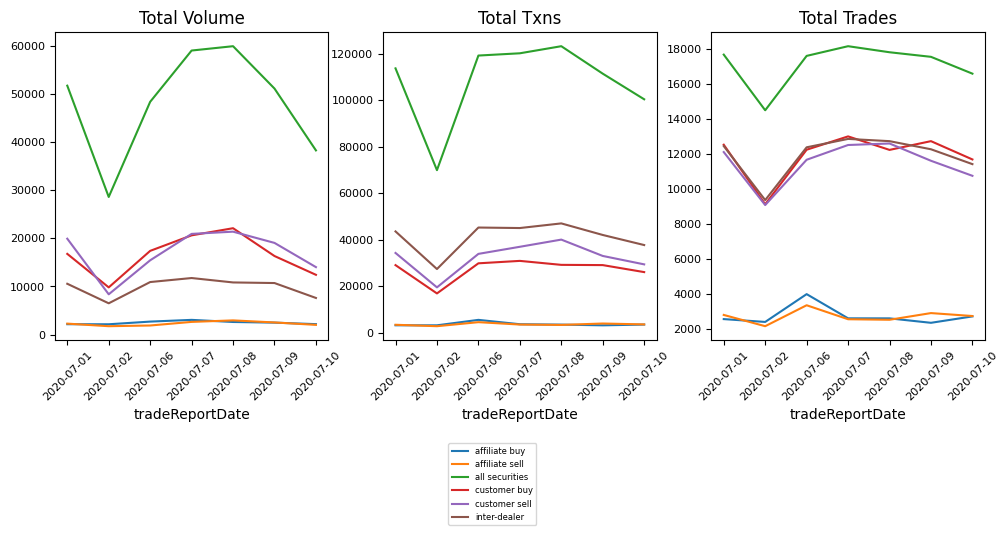

In [12]:
dataset_name = 'fixed_income_corpdebt_marketsentiment'
x_axis = 'tradeReportDate'
grouping = 'productCategory'
aggregate_method = 'count'
date_filter=[{'startDate': '2020-07-01', 'endDate': '2020-07-10', 'fieldName': 'tradeReportDate'}]
finra_api_queries.visualize_market_sentiment(dataset_name = dataset_name,
                                my_access_token = cindys_api_key,
                                x_axis = x_axis,
                                grouping = grouping,
                                date_filter = date_filter)

Testing Using PyTest

In [13]:
! poetry run pytest ./tests/test_finra_api_queries.py -vv

============================= test session starts =============================
platform win32 -- Python 3.9.4, pytest-7.2.0, pluggy-1.0.0 -- C:\Users\Cindy C\AppData\Local\pypoetry\Cache\virtualenvs\finra-api-queries-FZA2Mhb8-py3.9\Scripts\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\Cindy C\Documents\GitHub\Modern_Data_Structures\chen_cindy\finra_api_queries
plugins: cov-4.0.0
collecting ... collected 6 items

tests/test_finra_api_queries.py::test_retrieve_api_token PASSED          [ 16%]
tests/test_finra_api_queries.py::test_show_filterable_columns PASSED     [ 33%]
tests/test_finra_api_queries.py::test_retrieve_dataset PASSED            [ 50%]
tests/test_finra_api_queries.py::test_filter_by_weekly_stock PASSED      [ 66%]
tests/test_finra_api_queries.py::test_summarize_trading_breadth PASSED   [ 83%]
tests/test_finra_api_queries.py::test_visualize_market_sentiment PASSED  [100%]

============================== 6 passed in 8.45s ==============================


Windows fatal exception: code 0xc0000139

Thread 0x000049a8 (most recent call first):
  File "<frozen importlib._bootstrap>", line 228 in _call_with_frames_removed
  File "<frozen importlib._bootstrap_external>", line 1108 in create_module
  File "<frozen importlib._bootstrap>", line 565 in module_from_spec
  File "<frozen importlib._bootstrap>", line 666 in _load_unlocked
  File "<frozen importlib._bootstrap>", line 986 in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 1007 in _find_and_load
  File "C:\Users\Cindy C\AppData\Local\pypoetry\Cache\virtualenvs\finra-api-queries-FZA2Mhb8-py3.9\lib\site-packages\win32com\__init__.py", line 5 in <module>
  File "<frozen importlib._bootstrap>", line 228 in _call_with_frames_removed
  File "<frozen importlib._bootstrap_external>", line 790 in exec_module
  File "<frozen importlib._bootstrap>", line 680 in _load_unlocked
  File "<frozen importlib._bootstrap>", line 986 in _find_and_load_unlocked
  File "<frozen importlib._